# Multilabelling sur le dataset cleané

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl
import seaborn as sns
from ast import literal_eval

### Visualisation de la database

In [2]:
df = pd.read_csv('dataset_clean.csv',converters={"list_title": literal_eval,
                               "list_body": literal_eval,
                               "Tags_list": literal_eval})
df.head()

,Unnamed: 0,Id,Tags_list,list_title,list_body
0,0,4,[c#],"[convert, decimal, double, c]","[trackbar, form, opacity, decimal, trans, trac..."
1,1,6,"[html, css]","[width, collapse, percentage, width, child, el...","[absolutely, position, div, contain, several, ..."
2,3,9,"[c#, .net]","[calculate, someone, age, base, datetime, type...","[datetime, represent, person, birthday, calcul..."
3,4,11,[c#],"[calculate, relative, time, c]","[specific, datetime, value, display, relative,..."
4,6,13,[html],"[determine, user, timezone]","[standard, web, server, able, determine, user,..."


# Construction du bag of words

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer

X = df['list_title'] + df['list_body']
Y = df["Tags_list"]

# Initialize the "CountVectorizer" TFIDF for Full_doc
vectorizer = TfidfVectorizer(analyzer="word",
                             max_df=.6,
                             min_df=0.005,
                             tokenizer=None,
                             preprocessor=' '.join,
                             stop_words=None,
                             lowercase=False)

vectorizer.fit(X)
X_tfidf = vectorizer.transform(X)

print("Shape of X for Full_doc: {}".format(X_tfidf.shape))

# Multilabel binarizer for targets


multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(Y)
y_binarized = multilabel_binarizer.transform(Y)

print("Shape of y: {}".format(y_binarized.shape))

Shape of X for Full_doc: (7696, 1145)
Shape of y: (7696, 50)


### Split du dataset 

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_binarized,
                                                    test_size=0.2, random_state=8)

In [5]:
# import smart_open
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(X)

# Create Corpus
texts = X

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# ML non supervisé, utilisation du modèle LDA

In [6]:
from pprint import pprint
import gensim

# number of topics
num_topics = 20

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.013*"user" + 0.010*"net" + 0.008*"class" + 0.008*"call" + 0.008*"server" '
  '+ 0.007*"function" + 0.007*"object" + 0.006*"window" + 0.006*"database" + '
  '0.006*"run"'),
 (1,
  '0.011*"c" + 0.010*"script" + 0.009*"data" + 0.008*"application" + '
  '0.006*"sql" + 0.006*"database" + 0.005*"control" + 0.004*"program" + '
  '0.004*"server" + 0.004*"error"'),
 (2,
  '0.010*"list" + 0.009*"user" + 0.009*"c" + 0.007*"application" + '
  '0.005*"string" + 0.005*"window" + 0.005*"line" + 0.005*"best" + '
  '0.005*"form" + 0.005*"name"'),
 (3,
  '0.013*"class" + 0.009*"server" + 0.007*"value" + 0.007*"name" + '
  '0.007*"type" + 0.005*"c" + 0.005*"run" + 0.005*"public" + 0.005*"window" + '
  '0.005*"java"'),
 (4,
  '0.009*"sql" + 0.009*"c" + 0.008*"database" + 0.007*"data" + 0.006*"run" + '
  '0.006*"linq" + 0.006*"server" + 0.006*"user" + 0.005*"new" + 0.004*"well"'),
 (5,
  '0.014*"c" + 0.007*"application" + 0.005*"visual" + 0.005*"new" + '
  '0.005*"class" + 0.005*"name" + 0.005*"s

### Visualisation du modèle LDA

In [8]:
import pyLDAvis
import pyLDAvis.sklearn
import pyLDAvis.gensim_models as gensimvis
from IPython.core.display import display, HTML
pyLDAvis.enable_notebook()


%matplotlib inline

display(HTML("<style>.container { max-width:100% !important; }</style>"))
display(HTML("<style>.output_result { max-width:100% !important; }</style>"))
display(HTML("<style>.output_area { max-width:100% !important; }</style>"))
display(HTML("<style>.input_area { max-width:100% !important; }</style>"))

gensimvis.prepare(lda_model, corpus, id2word)

C:\Users\Lucas\Documents\formation_ML_OCR\projet_5\venv2\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
18     0.014332 -0.006521       1        1  8.175245
17     0.046808 -0.014883       2        1  6.889106
19    -0.030640 -0.037951       3        1  6.383332
10     0.004621  0.002680       4        1  6.002716
0      0.010763  0.007428       5        1  5.764783
15     0.016251  0.003312       6        1  5.498899
1      0.014638  0.003638       7        1  5.437321
13    -0.029201 -0.020166       8        1  5.280567
8     -0.016775 -0.024786       9        1  5.064594
9     -0.034305  0.053746      10        1  5.058870
14    -0.008649 -0.019495      11        1  5.057802
2     -0.025868  0.003244      12        1  4.847159
16     0.015247 -0.000299      13        1  4.824965
11     0.010988 -0.014759      14        1  4.330948
3     -0.016330 -0.002641      15        1  4.145549
5     -0.002156 -0.001277      16        1  3.724513
4      0.031147  0.000811      17        1  3.584891
12     0.002311  0.064374      18        1  3.487923
7     -0.044698  0.000210      19        1  3.240808
6      0.041515  0.003336      20        1  3.200010, topic_info=         Term         Freq        Total Category  logprob  loglift
630    window  1571.000000  1571.000000  Default  30.0000  30.0000
74     string  1610.000000  1610.000000  Default  29.0000  29.0000
2           c  2823.000000  2823.000000  Default  28.0000  28.0000
83        net  1339.000000  1339.000000  Default  27.0000  27.0000
72     server  2226.000000  2226.000000  Default  26.0000  26.0000
..        ...          ...          ...      ...      ...      ...
307  database    36.759524  1646.446050  Topic20  -5.8262  -0.3600
103       new    34.547421  1629.697207  Topic20  -5.8883  -0.4118
310  function    32.772444  1252.098376  Topic20  -5.9410  -0.2010
72     server    35.792510  2226.609940  Topic20  -5.8529  -0.6885
14    project    32.250175  1195.570082  Topic20  -5.9571  -0.1708

[1677 rows x 6 columns], token_table=       Topic      Freq    Term
term                          
4841       1  0.109775       _
4841       2  0.268340       _
4841       3  0.109775       _
4841       5  0.012197       _
4841       6  0.012197       _
...      ...       ...     ...
29672      9  0.760305  yytext
285        8  0.162602     zos
285       18  0.487806     zos
12539      6  0.827647       â
22283     17  0.553778       å

[6400 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[19, 18, 20, 11, 1, 16, 2, 14, 9, 10, 15, 3, 17, 12, 4, 6, 5, 13, 8, 7])

# Utilisation d'algorithme de ML supervisés

### Knn Classifier

In [9]:
from sklearn.neighbors import KNeighborsClassifier

#X_train, X_test, y_train, y_test

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)

### OneVsRest classifier with LinearSVC

In [11]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

OvR_SVC = OneVsRestClassifier(LinearSVC())
OvR_SVC.fit(X_train,y_train)
OvR_SVC_pred = OvR_SVC.predict(X_test)

### RandomForest Classifier 

In [12]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier()
RFC.fit(X_train,y_train)
RFC_pred = RFC.predict(X_test)

### Comparaison des modèles ML supervisés

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def results(pred,true):
    dico = {'accuracy' : accuracy_score(pred,true),
            'precision_score' : precision_score(pred,true,average = 'macro'),
            'recall_score' : recall_score(pred,true,average = 'macro'),
            'f1_score' : f1_score(pred,true,average = 'macro')}
    return dico



res_knn = results(knn_pred,y_test)
res_ovr_svc = results(OvR_SVC_pred,y_test)
res_rfc = results(RFC_pred,y_test)



print('KNN',res_knn)
print('OVR w SVC',res_ovr_svc)
print('Random Forest',res_rfc)

KNN {'accuracy': 0.12142857142857143, 'precision_score': 0.19729860406440522, 'recall_score': 0.6282149227107121, 'f1_score': 0.2852680019144565}
OVR w SVC {'accuracy': 0.2766233766233766, 'precision_score': 0.4177117945846331, 'recall_score': 0.7388853453424835, 'f1_score': 0.511669528255889}
Random Forest {'accuracy': 0.2538961038961039, 'precision_score': 0.26047000701367373, 'recall_score': 0.6880137743331065, 'f1_score': 0.34840993915164065}


C:\Users\Lucas\Documents\formation_ML_OCR\projet_5\venv2\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lucas\Documents\formation_ML_OCR\projet_5\venv2\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


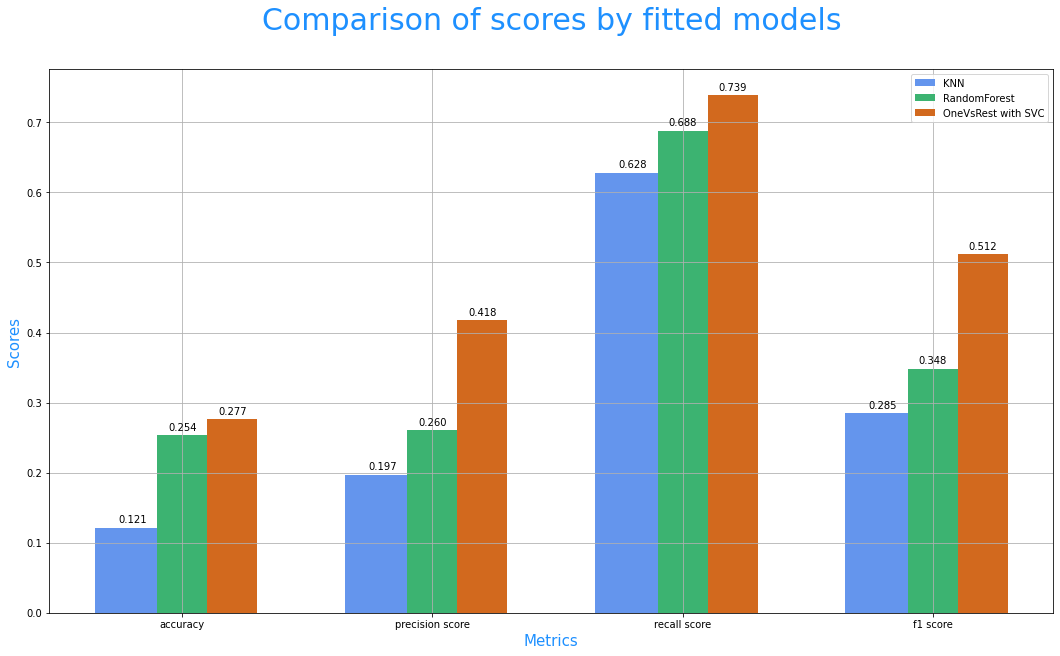

In [43]:
fig = plt.figure(figsize=(18,10))
w1 = 0.2
w2 = 0.2
ax1 = fig.add_subplot(111)

labels = ['accuracy', 'precision score', 'recall score', 'f1 score']
x = np.arange(len(labels)) 


knn_plot = ax1.bar(x-w1, list(res_knn.values()), width = 0.3,align='center',color = 'cornflowerblue',label="KNN")
RFC_plot = ax1.bar(x, list(res_rfc.values()), width = 0.2,align='center',color = 'mediumseagreen',label="RandomForest")
ovrsvc_plot = ax1.bar(x+w1, list(res_ovr_svc.values()), width = 0.2,align='center',color = 'chocolate',label="OneVsRest with SVC")

ax1.set_ylabel('Scores',color="dodgerblue",fontdict={'fontsize': 15})
ax1.set_xlabel('Metrics',color="dodgerblue",fontdict={'fontsize': 15})
ax1.set_title('Comparison of scores by fitted models\n',
              color="dodgerblue", 
              fontdict={'fontsize': 30})

ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.legend()
# ax1.set_xticks(list(res_knn.keys()))


# lines, labels = ax1.get_legend_handles_labels()

ax1.bar_label(knn_plot, padding=3,fmt='%.3f')
ax1.bar_label(RFC_plot, padding=3,fmt='%.3f')
ax1.bar_label(ovrsvc_plot, padding=3,fmt='%.3f')
# plt.xticks(range(len(res_knn)), list(res_knn.keys()))

plt.grid()
plt.show()

# Méthode supervisée, utilisation d'un réseau de neurone

Création d'un réseau de neurone profond avec 3 layers denses et des dropout layers entre chaque couche afin d'éviter l'overfitting

In [15]:
import tensorflow as tf

from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras import layers
from keras.backend import clear_session
from keras import backend as K

In [16]:
#Build functions to evaluate Keras NN model


def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [17]:
def build_nn(input_dim, hidden_neurons, output_dim):
    """
    Construct a Keras model which will be used to 
    fit/predict in SKlearn pipeline.
    """

    # Create RNN
    
    model = Sequential()
    model.add(layers.Dense(hidden_neurons,
                           input_dim=input_dim,
                           activation='relu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(hidden_neurons,
                           input_dim=input_dim,
                           activation='relu'))
    model.add(layers.Dropout(0.1))
    model.add(layers.Dense(output_dim,
                           activation='sigmoid'))
    
    # Compile model
    model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy', recall_m, precision_m, f1_m,])#, recall_score, precision_score, f1_score])
    model.summary()
    
    return model

In [18]:
clear_session()

model_params = {
    'input_dim': X_train.shape[1],
    'hidden_neurons': 150,
    'output_dim': y_train.shape[1]}

keras_model = build_nn(**model_params)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 150)               171900    
                                                                 
 dropout (Dropout)           (None, 150)               0         
                                                                 
 dense_1 (Dense)             (None, 150)               22650     
                                                                 
 dropout_1 (Dropout)         (None, 150)               0         
                                                                 
 dense_2 (Dense)             (None, 50)                7550      
                                                                 
Total params: 202,100
Trainable params: 202,100
Non-trainable params: 0
_________________________________________________________________


### Entraînement du modèle

In [19]:
n_epochs = 25

history = keras_model.fit(X_train.toarray(), y_train,
                          epochs=n_epochs,
                          batch_size=256,
                          verbose=0,
                          validation_data=(X_test.toarray(), y_test),
                          shuffle=True)

### Visualisation de l'entraînement du modèle

In [20]:
scores = keras_model.evaluate(X_test.toarray(), y_test)

49/49 [==============================] - 0s 2ms/step - loss: 0.0744 - accuracy: 0.4325 - recall_m: 0.3268 - precision_m: 0.7354 - f1_m: 0.4499


In [21]:
NN_scores = {'accuracy' : scores[1],
            'precision_score' : scores[3],
            'recall_score' : scores[2],
            'f1_score' : scores[4]}

In [28]:
train_accuracy = history.history.get('accuracy', [])
val_accuracy = history.history.get('val_accuracy', [])

train_loss = history.history.get('loss',[])
val_loss = history.history.get('val_loss',[])
x_scale = np.arange((len(train_accuracy)))

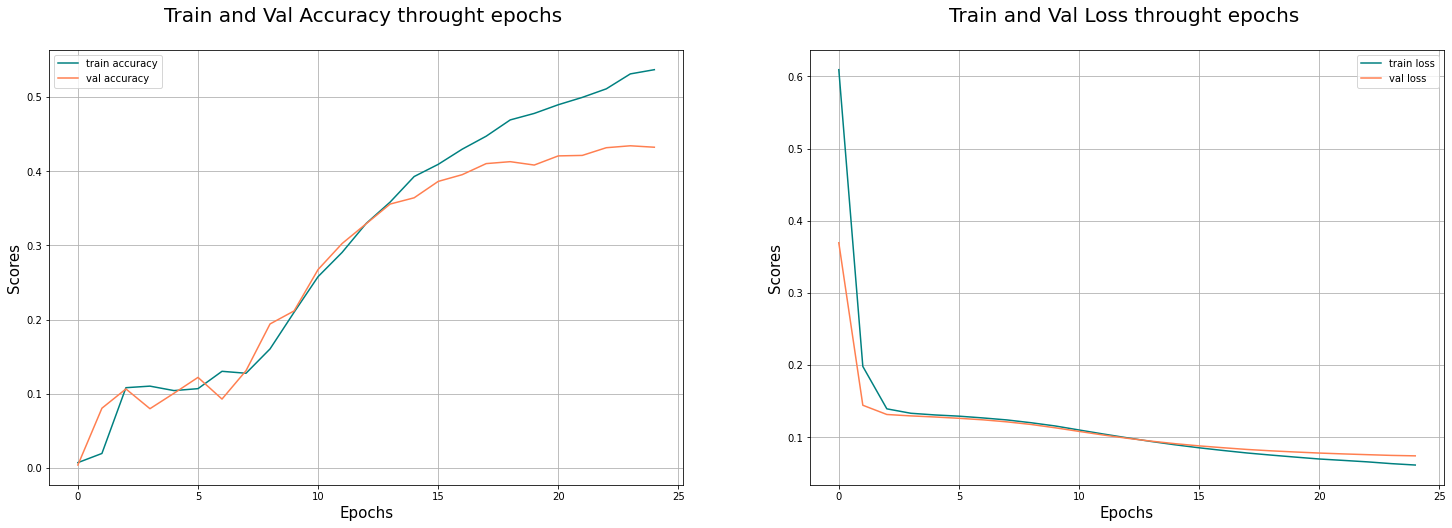

In [49]:
fig, ax = plt.subplots(1, 2, figsize=(25, 8))

color_train = 'teal'
color_val = 'coral'
color_title = 'k'
ax[0].plot(x_scale,train_accuracy,label='train accuracy',color = color_train)
ax[0].plot(x_scale,val_accuracy,label='val accuracy',color = color_val)

ax[0].grid()
ax[0].set_xlabel('Epochs',color = color_title,fontdict={'fontsize': 15})
ax[0].set_ylabel('Scores',color = color_title,fontdict={'fontsize': 15})
ax[0].legend()
ax[0].set_title('Train and Val Accuracy throught epochs \n',color = color_title,fontdict={'fontsize': 20})

ax[1].plot(x_scale,train_loss,label='train loss',color = color_train)
ax[1].plot(x_scale,val_loss,label='val loss',color = color_val)


ax[1].grid()

ax[1].set_xlabel('Epochs',color = color_title,fontdict={'fontsize': 15})
ax[1].set_ylabel('Scores',color = color_title,fontdict={'fontsize': 15})
ax[1].legend()
ax[1].set_title('Train and Val Loss throught epochs \n',color = color_title,fontdict={'fontsize': 20})





plt.show()

# Visualisation des metrics des différents modèles

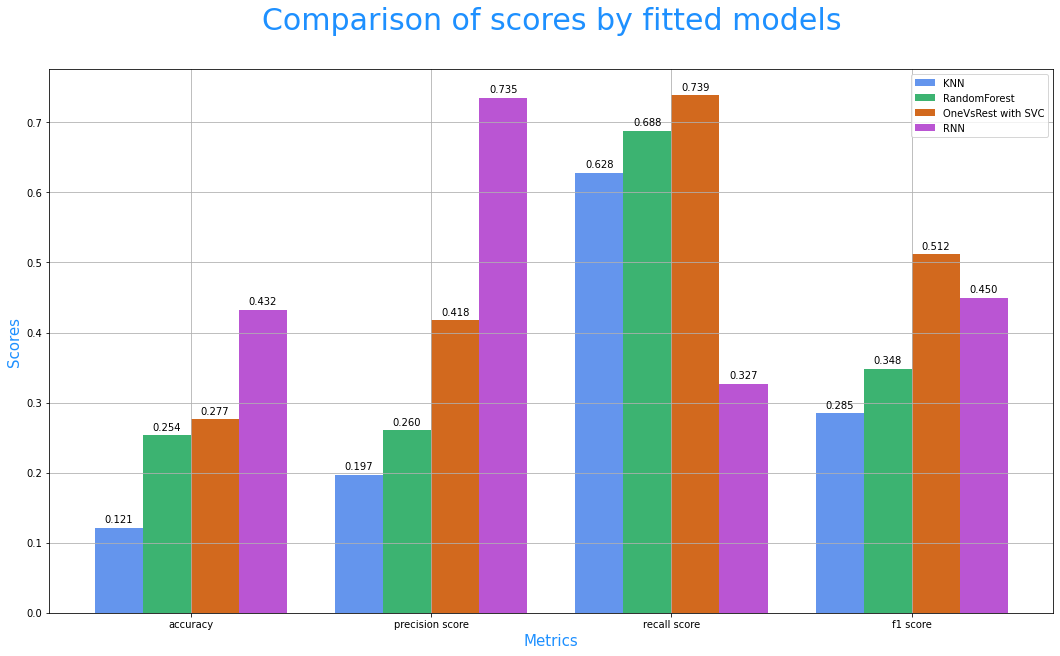

In [56]:
fig = plt.figure(figsize=(18,10))
w1 = 0.2
w2 = 0.2
ax1 = fig.add_subplot(111)

labels = ['accuracy', 'precision score', 'recall score', 'f1 score']
x = np.arange(len(labels)) 


knn_plot = ax1.bar(x-2*w1, list(res_knn.values()), width = 0.2,align='edge',color = 'cornflowerblue',label="KNN")
RFC_plot = ax1.bar(x-w1, list(res_rfc.values()), width = 0.2,align='edge',color = 'mediumseagreen',label="RandomForest")
ovrsvc_plot = ax1.bar(x, list(res_ovr_svc.values()), width = 0.2,align='edge',color = 'chocolate',label="OneVsRest with SVC")
rnn_plot = ax1.bar(x+w1, list(NN_scores.values()), width = 0.2,align='edge',color = 'mediumorchid',label="RNN")



ax1.set_ylabel('Scores',color="dodgerblue",fontdict={'fontsize': 15})
ax1.set_xlabel('Metrics',color="dodgerblue",fontdict={'fontsize': 15})
ax1.set_title('Comparison of scores by fitted models\n',
              color="dodgerblue", 
              fontdict={'fontsize': 30})

ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.legend()
# ax1.set_xticks(list(res_knn.keys()))


# lines, labels = ax1.get_legend_handles_labels()

ax1.bar_label(knn_plot, padding=3,fmt='%.3f')
ax1.bar_label(RFC_plot, padding=3,fmt='%.3f')
ax1.bar_label(ovrsvc_plot, padding=3,fmt='%.3f')
ax1.bar_label(rnn_plot, padding=3,fmt='%.3f')
# plt.xticks(range(len(res_knn)), list(res_knn.keys()))

plt.grid()
plt.show()

# Création d'une API disponible pour le test